In [3]:
pip install cryptography --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import config as a Python module
import sys
sys.path.append('./config')
import config

In [5]:
import pandas as pd
from utilities.data_manager import DataManager
from utilities.backtest_analysis import BacktestAnalysis
#from strategies import envelope as strat
from scenarios.scenarios_loader import load_scenario # New

/home/spoonbill/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
# Import from the Data Engine
data = DataManager(config.EXCHANGE_NAME)

# Load the Scenario and Strategy
scenario = load_scenario("btc_macd_daily_full") #btc_sma_daily btc_macd_daily_full

import importlib
# Import dynamically from the strategies folder
module_path = f"strategies.{scenario.strategy_name}"
strat = importlib.import_module(module_path)

# Load OHLCV Data for the Scenario
ohlcv = data.load(scenario.symbol, timeframe=scenario.timeframe, start_date=scenario.start_date)

In [7]:
#pd.read_csv(config.SCENARIO_FILEPATH)['strategy_id'].dropna().to_frame()
#for attr, value in vars(scenario).items():
#    if attr != "raw":
#        print(f"{attr}: {value}")

In [8]:
# Backtest the Strategy for the Scenario
strategy = strat.Strategy(scenario.strategy_params, ohlcv)
strategy.run_backtest(
    initial_balance=scenario.initial_balance,
    leverage=scenario.leverage,
    open_fee_rate=scenario.open_fee_rate,
    close_fee_rate=scenario.close_fee_rate
)

In [9]:
results = BacktestAnalysis(strategy)
results.print_metrics()
results.save_metrics_as_csv(scenario)

--- General ---
Period: [2017-08-17 00:00:00] -> [2025-08-15 00:00:00]
Initial balance: 1000.0 $
Final balance: 5205.08 $
Performance: 420.51 %
Hodl performance: 2638.39%
Performance/Hodl: -80.99 %
Total trades: 30
Time in position: 46.85 %

--- Health ---
Win rate: 33.33 %
Max drawdown at trade close: -45.84 %
Max drawdown at equity update: -64.63 %
Profit factor: 2.94
Return over max drawdown: 6.51
Sharpe ratio: 0.75
Sortino ratio: 0.67
Calmar ratio: 0.42

--- Trades ---
Average net PnL: 14.02 %
Average trades per day: 0.01
Average trades duration: 45 days 14:24:00
Best trade: +389.54 % entered 2020-10-13 00:00:00 exited 2021-04-07 00:00:00
Worst trade: -30.06 % entered 2022-07-18 00:00:00 exited 2022-11-09 00:00:00
Total winning trades: 10
Total loosing trades: 20
Average net PnL winning trades: 63.73 %
Average net PnL loosing trades: -10.84 %
Mean winning trades duration: 83 days 07:12:00
Mean loosing trades duration: 26 days 18:00:00
Max win streak: 4
Max lose streak: 7
Open reaso

In [11]:
strategy.trades_info
# path = symbol.replace('/', '-').replace(':', '-') 
# strategy.save_trades_info(path)

,open_time,close_time,open_reason,close_reason,open_price,close_price,initial_margin,net_pnl,net_pnl_pct,open_notional_value,close_notional_value,amount,open_fee,close_fee,sl_price,liquidation_price,open_balance,close_balance
0,2018-04-22,2018-05-17,Open long,MACD Death Cross,8787.02,8041.460,1000.0,-85.579890,-8.557989,999.8,914.969092,0.113781,0.2,0.548981,6150.914,0.00,0.000000,914.420110
1,2018-07-17,2018-08-10,Open long,MACD Death Cross,7317.44,6144.010,1000.0,-161.032338,-16.103234,999.8,839.471345,0.136632,0.2,0.503683,5122.208,0.00,-85.579890,753.387772
2,2018-08-28,2018-09-10,Open long,MACD Death Cross,7076.11,6312.000,1000.0,-108.697977,-10.869798,999.8,891.837125,0.141292,0.2,0.535102,4953.277,0.00,-246.612228,644.689795
3,2018-09-21,2018-11-15,Open long,MACD Death Cross,6759.02,5753.400,1000.0,-149.462796,-14.946280,999.8,851.047832,0.147921,0.2,0.510629,4731.314,0.00,-355.310205,495.226999
4,2019-01-03,2019-07-19,Open long,MACD Death Cross,3766.78,10504.290,1000.0,1786.435053,178.643505,999.8,2788.107918,0.265426,0.2,1.672865,2636.746,0.00,-504.773001,2281.662052
5,2019-08-08,2019-08-14,Open long,MACD Death Cross,11999.77,10050.370,1000.0,-163.123051,-16.312305,999.8,837.379377,0.083318,0.2,0.502428,8399.839,0.00,1281.662052,2118.539001
6,2019-11-02,2019-11-12,Open long,MACD Death Cross,9289.52,8821.940,1000.0,-51.093759,-5.109376,999.8,949.475927,0.107627,0.2,0.569686,6502.664,0.00,1118.539001,2067.445242
7,2020-01-07,2020-02-29,Open long,MACD Death Cross,8145.28,8523.610,1000.0,45.610726,4.561073,999.8,1046.238469,0.122746,0.2,0.627743,5701.696,0.00,1067.445242,2113.055968
8,2020-04-18,2020-06-26,Open long,MACD Death Cross,7248.60,9162.210,1000.0,262.986140,26.298614,999.8,1263.744386,0.137930,0.2,0.758247,5074.020,0.00,1113.055968,2376.042108
9,2020-07-25,2020-09-03,Open long,MACD Death Cross,9700.42,10140.850,1000.0,44.566992,4.456699,999.8,1045.194108,0.103068,0.2,0.627116,6790.294,0.00,1376.042108,2420.609100


In [10]:
strategy.equity_record
# strategy.save_equity_record(path)

,price,equity
time,,
2017-08-17,4285.08,1000.000000
2017-08-18,4108.37,1000.000000
2017-08-19,4139.98,1000.000000
2017-08-20,4086.29,1000.000000
2017-08-21,4016.00,1000.000000
...,...,...
2025-04-03,83213.09,5419.122301
2025-04-04,83889.87,5412.520314
2025-04-05,83537.99,5415.952902


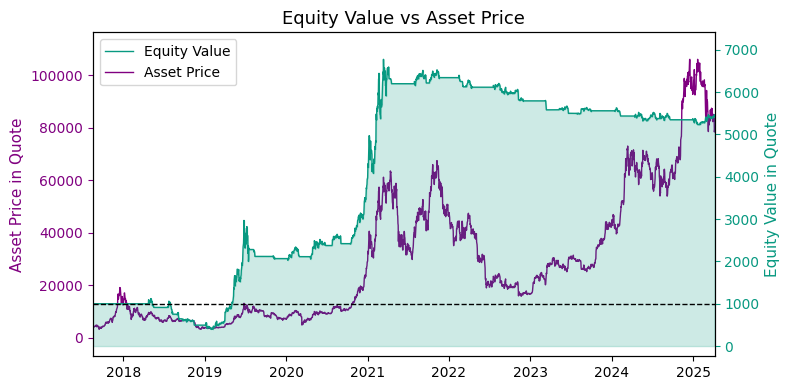

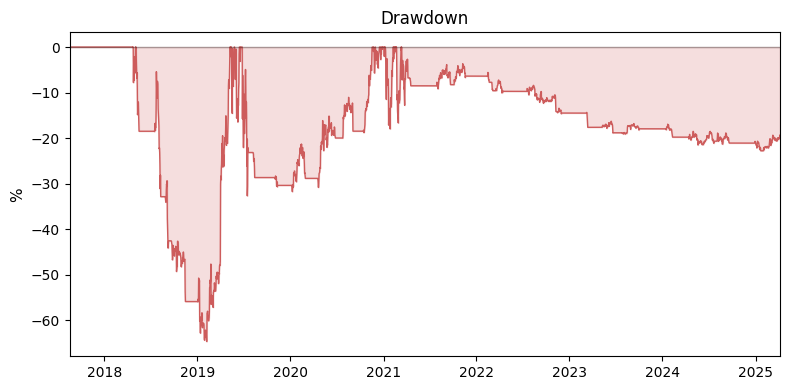

In [11]:
results.plot_equity()
# results.plot_equity(path)

results.plot_drawdown()
# results.plot_drawdown(path)

In [ ]:
results.plot_monthly_performance(year="all")
# results.plot_monthly_performance(year="all", path)

In [ ]:
indicators = {
    'average': {
        'color': "white",
        'df': pd.DataFrame({
            'time': strategy.data.index,
            'average': strategy.data['average'],
        }).dropna()        
    } 
}

for i, e in enumerate(scenario.strategy_params['envelopes']):
    indicators.update({
        f'band_high_{i+1}' : {
            'color': "red",
            'df': pd.DataFrame({
                'time': strategy.data.index,
                f'band_high_{i+1}': strategy.data[f'band_high_{i+1}'],
            }).dropna()   
        },
        f'band_low_{i+1}' : {
            'color': "green",
            'df': pd.DataFrame({
                'time': strategy.data.index,
                f'band_low_{i+1}': strategy.data[f'band_low_{i+1}'],
            }).dropna()  
        },
    })

results.plot_candlestick(indicators=indicators)